# Introduction

Source: https://www.kaggle.com/code/abdallahsaadelgendy/diabetes-prediction-eda-preprocessing-models/notebook

The dataset originally has **330 features (columns)** but based on diabetes disease research regarding factors influencing diabetes disease and other chronic health conditions the publisher of that dataset clean **BRFSS** data into a **useable format for machine learning alogrithms**. 
__________________________________________________________________________________________________________________________

**Important risk factors for diabetes :**

( blood pressure (high) , cholesterol (high) , smoking , diabetes , obesity , age , sex , race , diet , exercise , alcohol consumption , BMI , Household Income , Marital Status , Sleep , Time since last checkup , Education , Health care coverage , Mental Health )
___________________________________________________________________________________________________________________________

### About Columns :

**Diabetes_binary** : you have diabetes (0,1)

**HighBP** : Adults who have been told they have high blood pressure by a doctor, nurse, or other health professional (0,1)

**HighChol** : Have you EVER been told by a doctor, nurse or other health professional that your blood cholesterol is high? (0,1)

**CholCheck** : Cholesterol check within past five years (0,1)

**BMI** : Body Mass Index (BMI) 

**Smoker** : Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] (0,1)

**Stroke** : (Ever told) you had a stroke. (0,1)

**HeartDiseaseorAttack** : Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI) (0,1)

**PhysActivity** : Adults who reported doing physical activity or exercise during the past 30 days other than their regular job (0,1)

**Fruits** : Consume Fruit 1 or more times per day (0,1)

**Veggies** : Consume Vegetables 1 or more times per day (0,1)

**HvyAlcoholConsump** : Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week)(0,1)

**AnyHealthcare** : Do you have any kind of health care coverage, including health insurance, prepaid plans such as HMOs, or government plans such as Medicare, or Indian Health Service? (0,1)

**NoDocbcCost** : Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? (0,1)

**GenHlth** : Would you say that in general your health is: rate (1 ~ 5)

**MentHlth** : Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good? (0 ~ 30)

**PhysHlth** : Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? (0 ~ 30)

**DiffWalk** : Do you have serious difficulty walking or climbing stairs? (0,1)

**Sex** : Indicate sex of respondent (0,1) (Female or Male)

**Age** : Fourteen-level age category (1 ~ 14)

**Education** : What is the highest grade or year of school you completed? (1 ~ 6)

**Income** : Is your annual household income from all sources: (If respondent refuses at any income level, code "Refused.") (1 ~ 8)

_________________________________________________________________________________________________________________________

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import math

from sklearn.datasets import make_classification
from imblearn.under_sampling import NearMiss
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA

from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.preprocessing import FunctionTransformer

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin


from sklearn.metrics import confusion_matrix, classification_report

# replace  plot_roc_curve with RocCurveDisplay
from sklearn.metrics import RocCurveDisplay


from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, accuracy_score
from mlxtend.plotting import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

import joblib


import warnings
warnings.filterwarnings("ignore")

________________________________________________________________________________________________________________

# Load Data 

______________________________________________________________________________________________________________________

In [2]:
data = pd.read_csv("../../data/diabetes_012_health_indicators_BRFSS2015.csv" , sep = "," , encoding = 'utf-8')

data['Diabetes_binary'] = data['Diabetes_012'].apply(lambda x: 0 if x==0 else 1)
data.drop(columns=['Diabetes_012'], inplace=True)

print(data.shape)

(253680, 22)


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HighBP                253680 non-null  float64
 1   HighChol              253680 non-null  float64
 2   CholCheck             253680 non-null  float64
 3   BMI                   253680 non-null  float64
 4   Smoker                253680 non-null  float64
 5   Stroke                253680 non-null  float64
 6   HeartDiseaseorAttack  253680 non-null  float64
 7   PhysActivity          253680 non-null  float64
 8   Fruits                253680 non-null  float64
 9   Veggies               253680 non-null  float64
 10  HvyAlcoholConsump     253680 non-null  float64
 11  AnyHealthcare         253680 non-null  float64
 12  NoDocbcCost           253680 non-null  float64
 13  GenHlth               253680 non-null  float64
 14  MentHlth              253680 non-null  float64
 15  

In [4]:
data.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0,0
1,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0,0
2,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0,0
3,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0,0
4,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0,0


In [5]:
data.describe()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,0.811420,...,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875,0.157588
std,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,0.391175,...,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148,0.364355
min,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000,0.000000
50%,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000,0.000000
75%,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000,0.000000
max,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000,1.000000


_____________________________________________________________________________________________________________________________

# Preprocessing

In [6]:
# Transform the data to integer
num_cols = data.columns
data[num_cols] = data[num_cols].astype(int)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   HighBP                253680 non-null  int64
 1   HighChol              253680 non-null  int64
 2   CholCheck             253680 non-null  int64
 3   BMI                   253680 non-null  int64
 4   Smoker                253680 non-null  int64
 5   Stroke                253680 non-null  int64
 6   HeartDiseaseorAttack  253680 non-null  int64
 7   PhysActivity          253680 non-null  int64
 8   Fruits                253680 non-null  int64
 9   Veggies               253680 non-null  int64
 10  HvyAlcoholConsump     253680 non-null  int64
 11  AnyHealthcare         253680 non-null  int64
 12  NoDocbcCost           253680 non-null  int64
 13  GenHlth               253680 non-null  int64
 14  MentHlth              253680 non-null  int64
 15  PhysHlth              253680 non-n

**Check null values**

In [8]:
data.isnull().sum()

HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
Diabetes_binary         0
dtype: int64

_____________________________________________________________________________________________________

**Drop dublicated data**

In [9]:
data.duplicated().sum()

np.int64(23968)

In [10]:
data.drop_duplicates(inplace = True)

In [11]:
data.duplicated().sum()

np.int64(0)

In [12]:
data.shape

(229712, 22)

_____________________________________________________________________________________________________________________

### Feature selection

In [13]:
# apply SelectKBest class to extract top 10 best features
# bestFeatures = SelectKBest(score_func=chi2, k=15)
# fit = bestFeatures.fit(X, Y)

# df_scores = pd.DataFrame(fit.scores_)
# df_columns = pd.DataFrame(X.columns)

# #concatenating two dataframes for better visualization
# f_Scores = pd.concat([df_columns,df_scores],axis=1)               # feature scores
# f_Scores.columns = ['Feature','Score']

# f_Scores.sort_values('Score', ascending=False)

"Fruits" , "Veggies" , "Sex" , "CholCheck" , " AnyHealthcare" will not be with us 

In [14]:
colomns = ["Fruits" , "Veggies" , "Sex" , "CholCheck" , "AnyHealthcare"]

In [15]:
# data.drop(colomns , axis= 1 ,inplace=True)

________________________________________________________________________________________________________________________

# Data Splitting 

In [16]:
X=data.drop(["Diabetes_binary"],axis=1)
Y=data["Diabetes_binary"]

______________________________________________________________________________________________________

# Dealing with imbalancing



In [17]:
Y.value_counts()

Diabetes_binary
0    190055
1     39657
Name: count, dtype: int64

In [18]:
nm = NearMiss(version=1, n_neighbors=3)

x_sm, y_sm = nm.fit_resample(X, Y)

# back to a dataframe
x_sm = pd.DataFrame(x_sm, columns=X.columns)
y_sm = pd.Series(y_sm, name=Y.name)

print(y_sm.shape , x_sm.shape)
print(y_sm.value_counts())

(79314,) (79314, 21)
Diabetes_binary
0    39657
1    39657
Name: count, dtype: int64


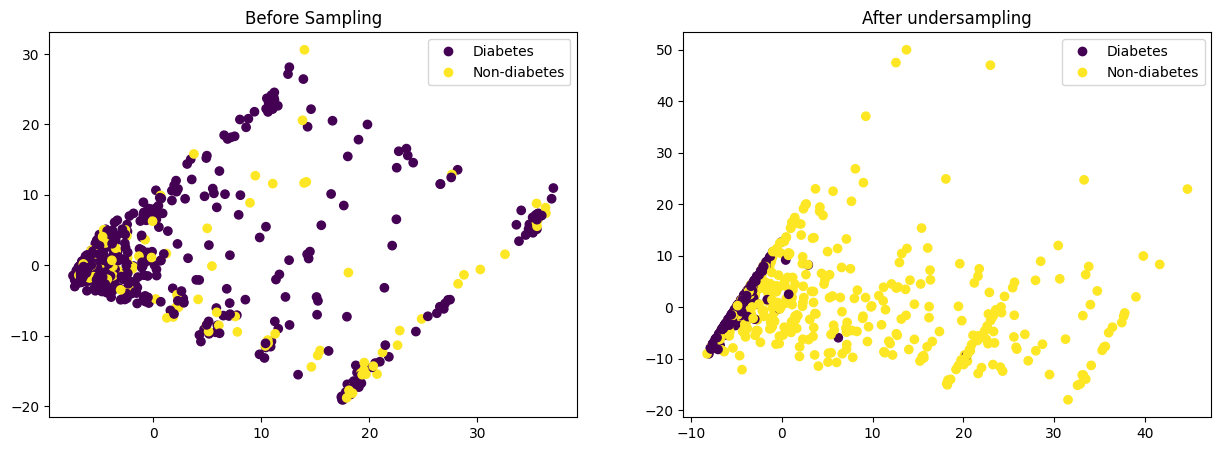

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))
axe = ax.ravel()


def plot_pca(x_all, y_all, ax, title=""):
    tmp = pd.concat([x_all, y_all], axis=1).sample(1000)
    x = tmp.drop(columns=['Diabetes_binary'])
    y = tmp['Diabetes_binary']
    
    pca = PCA()
    Xt = pca.fit_transform(x)
    plot = ax.scatter(Xt[:,0], Xt[:,1], c=y)
    ax.set(title=title)
    ax.legend(handles=plot.legend_elements()[0], labels=['Diabetes', 'Non-diabetes']);

plot_pca(X, Y, ax=axe[0], title="Before Sampling")
plot_pca(x_sm, y_sm, ax=axe[1], title="After undersampling")

_______________________________________________________________________________________________________________________

# Modeling

In [20]:
# transform into int

class TypeTransformer(BaseEstimator, TransformerMixin):
    def transform(self, X):
        X = X.astype(int)
        return X


In [21]:
X_train , X_test , Y_train , Y_test = train_test_split(x_sm,y_sm, test_size=0.3 , random_state=42)

print(f"Train shape: {X_train.shape}")
print(f"Test shape: {X_test.shape}")

Train shape: (55519, 21)
Test shape: (23795, 21)


## All steps into a pipeline

In [33]:
rf_model = RandomForestClassifier(max_depth=10, n_estimators=100, random_state=42)

preprocessor = ColumnTransformer(
    transformers=[
        # ('to_int', TypeTransformer(), make_column_selector(dtype_include="float")),
        ('num_impute', SimpleImputer(missing_values=pd.NA, strategy='mean'), make_column_selector(dtype_exclude="object")),
        ('num_scaler', StandardScaler(), make_column_selector(dtype_include="number"))
    ],
    remainder='passthrough'
)

# TODO: issue with pandas DF when stacking ColumnTransformers
# Step 2: Define a column transformer for encoding and scaling
encoding = ColumnTransformer(
    transformers=[
        ('num_scaler', StandardScaler(), make_column_selector(dtype_include="number"))
    ],
    remainder='passthrough'
)

# Step 3: Create the final pipeline
pipeline = make_pipeline(
    preprocessor,
    # encoding,
    rf_model
)

In [32]:
# fitting the model on the train data
pipeline.fit(X_train, Y_train)


# save model
joblib.dump(pipeline, '../../models/diabetes_randomforest_pipeline.pkl')

# test load
# pipeline = joblib.load('../../models/diabetes_randomforest_pipeline.pkl')
# pipeline.predict(X_test)

array([0, 0, 0, ..., 1, 0, 0])

In [298]:
# make predictions on test set
y_pred = pipeline.predict(X_test)

print('Training set score: {:.4f}'.format(pipeline.score(X_train, Y_train)))

print('Test set score: {:.4f}'.format(pipeline.score(X_test, Y_test)))

#check MSE & RMSE 
mse = mean_squared_error(Y_test, y_pred)
print('Mean Squared Error : '+ str(mse))
rmse = math.sqrt(mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error : '+ str(rmse))

matrix = classification_report(Y_train, Y_train)
print("Train:\n", matrix)

matrix = classification_report(Y_test, y_pred)
print("Test:\n", matrix)

Mean Squared Error : 0.16301744063878967
Root Mean Squared Error : 0.4037541834319363


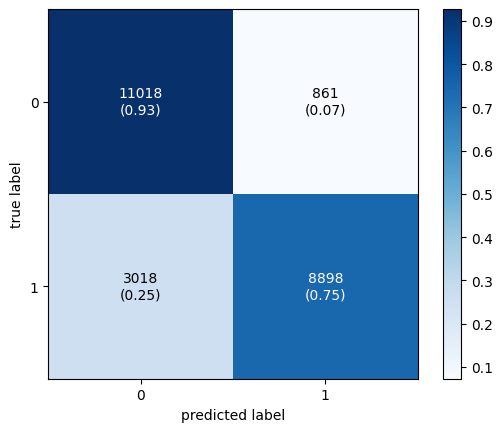

In [300]:
# calculating and plotting the confusion matrix
cm1 = confusion_matrix(Y_test, y_pred)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

**XGBoost**

In [153]:
from xgboost import XGBClassifier
xg = XGBClassifier(eval_metric= 'error', learning_rate= 0.1)
xg.fit(X_train , Y_train)

ModuleNotFoundError: No module named 'xgboost'

In [167]:
y_pred=xg.predict(X_test)

print('Training set score: {:.4f}'.format(xg.score(X_train, Y_train)))

print('Test set score: {:.4f}'.format(xg.score(X_test, Y_test)))

Training set score: 0.8770
Test set score: 0.8663


In [168]:
#check MSE & RMSE 
mse =mean_squared_error(Y_test, y_pred)
print('Mean Squared Error : '+ str(mse))
rmse = math.sqrt(mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error : '+ str(rmse))

Mean Squared Error : 0.13367206420057934
Root Mean Squared Error : 0.3656119038004361


In [169]:
matrix = classification_report(Y_test,y_pred )
print(matrix)

              precision    recall  f1-score   support

           0       0.81      0.95      0.88     10468
           1       0.94      0.79      0.86     10591

    accuracy                           0.87     21059
   macro avg       0.88      0.87      0.87     21059
weighted avg       0.88      0.87      0.87     21059



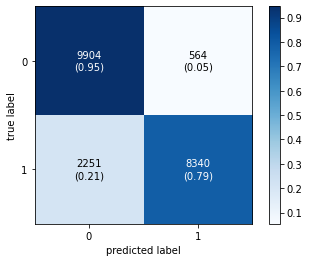

In [170]:
# calculating and plotting the confusion matrix
cm1 = confusion_matrix(Y_test,y_pred)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()